# 5/16: Plate 1

In [1]:
import os
import string
import numpy as np
import pandas as pd
from FlowCytometryTools import ThresholdGate, PolyGate
from matplotlib import pyplot as plt
from matplotlib import cm
from ckine.FCimports import importF

In [2]:
path_ = os.path.abspath('')

In [3]:
sample1A, unstained, isotype = importF("5-16", "1", "A", 1, "IL7R",1)
sample1B, unstained, isotype = importF("5-16", "2", "A", 1, "IL7R",1)
sample1A.data = sample1A.data.append(sample1B.data, ignore_index=True)

sample2A, unstained, isotype = importF("5-16", "1", "A", 1, "IL7R",None)
sample2B, unstained, isotype = importF("5-16", "2", "A", 1, "IL7R",None)
sample2A.data = sample2A.data.append(sample2B.data, ignore_index=True)




In [4]:
panel1 = sample1A.transform("tlog", channels=['VL6-H', 'VL4-H', 'BL1-H', 'VL1-H', 'BL3-H'])
panel2 = sample2A.transform("tlog", channels=['VL4-H', 'BL5-H'])
panel3 = sample2A.transform("tlog", channels=['RL1-H', 'VL4-H', 'BL3-H'])

## C) T helper and T regulatory cells

In [1]:
cd3cd4_gate = PolyGate([(5.3e03, 7.3e03), (5.3e03, 5.6e03), (7.5e03, 5.6e03), (7.5e03, 7.3e03)], ('VL4-H', 'VL6-H'), region='in', name='cd3cd4')
_ = panel1.plot(['VL4-H','VL6-H'], gates=cd3cd4_gate, gate_colors=['red'], cmap=cm.jet) #CD3, CD4
plt.title("Singlet Lymphocytes")
plt.xlabel("CD3")
plt.ylabel("CD4")
plt.grid()
print("Percent gated as CD3+CD4+: ", panel1.gate(cd3cd4_gate).counts/panel1.counts*100., "%")

NameError: name 'PolyGate' is not defined

Percent gated as T helper:  79.2880978865406 %
Percent gated as Treg:  5.512791991101223 %


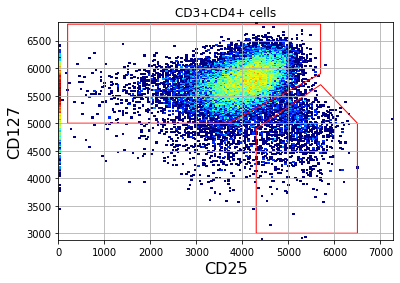

In [23]:
samplecd3cd4 = panel1.gate(cd3cd4_gate)
thelp_gate = PolyGate([(0.2e03, 6.8e03), (0.2e03, 5.0e03), (3.7e03, 5.0e03), (5.7e03, 5.9e03), (5.7e03, 6.8e03)], ('VL1-H', 'BL1-H'), region='in', name='thelp')
treg_gate = PolyGate([(4.3e03, 4.9e03), (4.3e03, 3.0e03), (6.5e03, 3.0e03), (6.5e03, 5.0e03), (5.7e03, 5.7e03)], ('VL1-H', 'BL1-H'), region='in', name='treg')
_ = samplecd3cd4.plot(['VL1-H','BL1-H'], gates=[thelp_gate,treg_gate], gate_colors=['red','red'], cmap=cm.jet) #CD3, CD4
plt.title("CD3+CD4+ cells")
plt.xlabel("CD25")
plt.ylabel("CD127")
plt.grid()
print("Percent gated as T helper: ", samplecd3cd4.gate(thelp_gate).counts/samplecd3cd4.counts*100., "%")
print("Percent gated as Treg: ", samplecd3cd4.gate(treg_gate).counts/samplecd3cd4.counts*100., "%")

In [7]:
samplethelp = samplecd3cd4.gate(thelp_gate)
sampletreg = samplecd3cd4.gate(treg_gate)

Percent gated as Memory T helper:  37.29969855624306 %
Percent gated as Naive T helper:  55.26997725950606 %


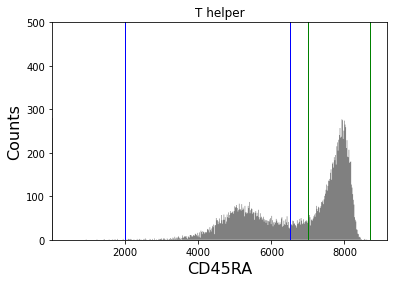

In [8]:
memthelpgate = ThresholdGate(6500.0, ['BL3-H'], region='below') & ThresholdGate(2000.0, ['BL3-H'], region='above')
naivethelpgate = ThresholdGate(7000.0, ['BL3-H'], region='above') & ThresholdGate(8700.0, ['BL3-H'], region='below')
_ = samplethelp.plot(['BL3-H'], gates=[memthelpgate,naivethelpgate], bins=500)
plt.xlabel("CD45RA")
plt.title("T helper")
plt.xlim(left=1)
plt.ylim(top=500)
print("Percent gated as Memory T helper: ", samplethelp.gate(memthelpgate).counts/samplethelp.counts*100., "%")
print("Percent gated as Naive T helper: ", samplethelp.gate(naivethelpgate).counts/samplethelp.counts*100., "%")

Percent gated as Memory Treg:  64.01906274821286 %
Percent gated as Naive Treg:  21.842732327243844 %


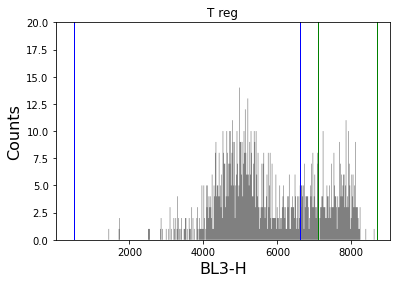

In [9]:
memtreggate = ThresholdGate(6600.0, ['BL3-H'], region='below') & ThresholdGate(500.0, ['BL3-H'], region='above')
naivetreggate = ThresholdGate(7100.0, ['BL3-H'], region='above') & ThresholdGate(8700.0, ['BL3-H'], region='below')
_ = sampletreg.plot(['BL3-H'],gates=[memtreggate,naivetreggate], bins=500)
plt.title("T reg")
plt.xlim(left=1)
plt.ylim(top=20)
print("Percent gated as Memory Treg: ", sampletreg.gate(memtreggate).counts/sampletreg.counts*100., "%")
print("Percent gated as Naive Treg: ", sampletreg.gate(naivetreggate).counts/sampletreg.counts*100., "%")

## D) NK Cells

Percent gated as NK:  0.3000534669741683 %
Percent gated as NKT:  1.7923406564467603 %


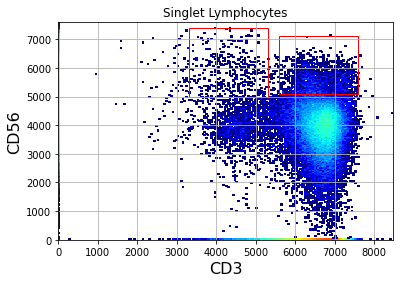

In [25]:
nk_gate = PolyGate([(3.3e3, 5.0e3), (5.3e3, 5.0e3), (5.3e3, 7.4e3), (3.3e3, 7.4e3)], ('VL4-H', 'BL5-H'), region='in', name='nk')
nkt_gate = PolyGate([(5.6e3, 5.1e3), (7.6e3, 5.1e3), (7.6e3, 7.1e3), (5.6e3, 7.1e3)], ('VL4-H', 'BL5-H'), region='in', name='nkt')
_ = panel2.plot(['VL4-H', 'BL5-H'], gates=[nk_gate,nkt_gate], gate_colors=['red','red'], cmap=cm.jet) #CD56 vs. CD3
samplenk = panel2.gate(nk_gate)
samplenkt = panel2.gate(nkt_gate)
print("Percent gated as NK: ", samplenk.counts/panel2.counts*100., "%")
print("Percent gated as NKT: ", samplenkt.counts/panel2.counts*100., "%")
plt.title("Singlet Lymphocytes")
plt.xlabel("CD3")
plt.ylabel("CD56")
plt.grid()

## E) CD8+ T cells

Percent gated as CD3+CD8+:  17.225143842120804 %


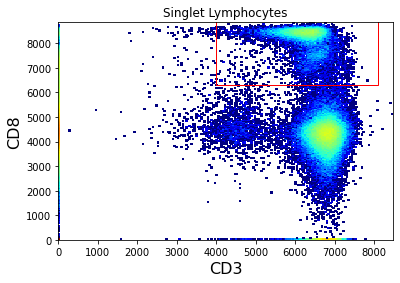

In [31]:
cd8_gate = PolyGate([(4.0e3, 6.3e3), (8.1e3, 6.3e3), (8.1e3, 9.0e3), (4.0e3, 9.0e3)], ('VL4-H', 'RL1-H'), region='in', name='cd8')
_ = panel3.plot(['VL4-H', 'RL1-H'], gates=cd8_gate, gate_colors=['red'], cmap=cm.jet) #CD8 vs. CD3
plt.title("Singlet Lymphocytes")
plt.xlabel("CD3")
plt.ylabel("CD8")
print("Percent gated as CD3+CD8+: ", panel3.gate(cd8_gate).counts/panel3.counts*100., "%")

Percent gated as Cytotoxic Memory:  26.01343525596479 %
Percent gated as Cytotoxic Naive:  61.07482047718323 %


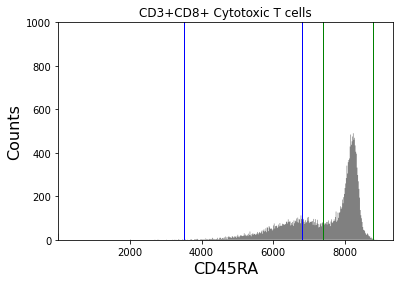

In [35]:
cd3cd8sample = panel3.gate(cd8_gate)
memcd3cd8gate = ThresholdGate(3500.0, ['BL3-H'], region='above') & ThresholdGate(6800.0, ['BL3-H'], region='below')
naivecd3cd8gate = ThresholdGate(7400.0, ['BL3-H'], region='above') & ThresholdGate(8800.0, ['BL3-H'], region='below')
_ = cd3cd8sample.plot(['BL3-H'], gates=[memcd3cd8gate,naivecd3cd8gate], bins=500)
plt.xlabel("CD45RA")
plt.title("CD3+CD8+ Cytotoxic T cells")
plt.xlim(left=1)
plt.ylim(top=1000)
print("Percent gated as Cytotoxic Memory: ", cd3cd8sample.gate(memcd3cd8gate).counts/cd3cd8sample.counts*100., "%")
print("Percent gated as Cytotoxic Naive: ", cd3cd8sample.gate(naivecd3cd8gate).counts/cd3cd8sample.counts*100., "%")